In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from ISLP.models import (ModelSpec as MS,
                         summarize)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

In [3]:
# Creating a simulated dataset
rng = np.random.default_rng(1)
x = rng.normal(size = 100)
y = x - 2 * x ** 2 + rng.normal(size = 100)

Part A : In this dataset, what is n and what is p?  Write out the model used to generate the data in equation form.

In this dataset n is 100 (the number of observations), and p is 2 (the variables x and x^2 are both used as predictors)

Y = x - 2x^2 + error term

<function matplotlib.pyplot.show(close=None, block=None)>

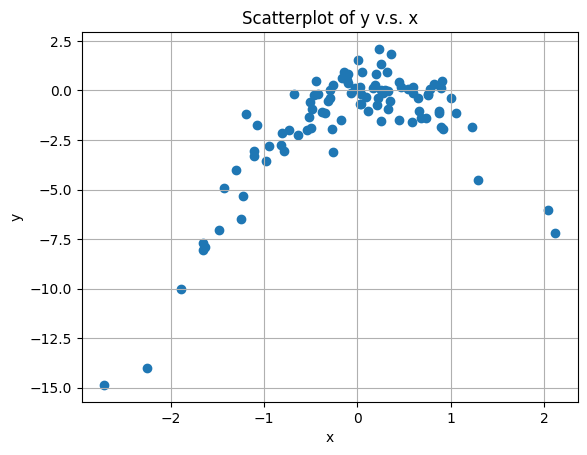

In [4]:
# Creating a scatterplot
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of y v.s. x')
plt.grid(True)
plt.show

Part B : Create a scatterplot of x v.s. y.  Comment on what you find.

The data has a fairly normal bell shaped distribution.  The y-values tend to increase as x increases up to around 0, after that as x increases y tends to decrease.

In [5]:
# Creates a DataFrame
df = pd.DataFrame({'x': x, 'y': y})
df['x2'] = df['x'] ** 2
df['x3'] = df['x'] ** 3
df['x4'] = df['x'] ** 4

# Define the models: list of tuples
models = [
    ('linear', ['x']),
    ('quadratic', ['x', 'x2']),
    ('cubic', ['x', 'x2', 'x3']),
    ('quartic', ['x', 'x2', 'x3', 'x4'])
]

# Initialize Leave-One-Out Cross Validator
loo = LeaveOneOut()

# Dictionary to hold LOOCV errors for each model
loocv_errors = {}

# Compute LOOCV error for each model using cross_val_score
for name, features in models:
    X = df[features].values
    y_vals = df['y'].values

    # cross_val_score uses negative MSE, so we negate the result to get positive MSE values
    neg_mse_scores = cross_val_score(LinearRegression(), X, y_vals,
                                     scoring = 'neg_mean_squared_error', cv = loo)
    loocv_error = -np.mean(neg_mse_scores)
    loocv_errors[name] = loocv_error
    print(f"LOOCV Error for {name} model: {loocv_error:.4f}")

LOOCV Error for linear model: 6.6330
LOOCV Error for quadratic model: 1.1229
LOOCV Error for cubic model: 1.3018
LOOCV Error for quartic model: 1.3324


Part C :  Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using ordinary least squares:

Our test MSE decreased significantly once we added in at least a quadratic predictor which could indicate that our true relationship might not be best represented linearly.

In [6]:
# Creating a new simulated dataset
new_rng = np.random.default_rng(174201)
x = new_rng.normal(size = 100)
y = x - 2 * x ** 2 + new_rng.normal(size = 100)

<function matplotlib.pyplot.show(close=None, block=None)>

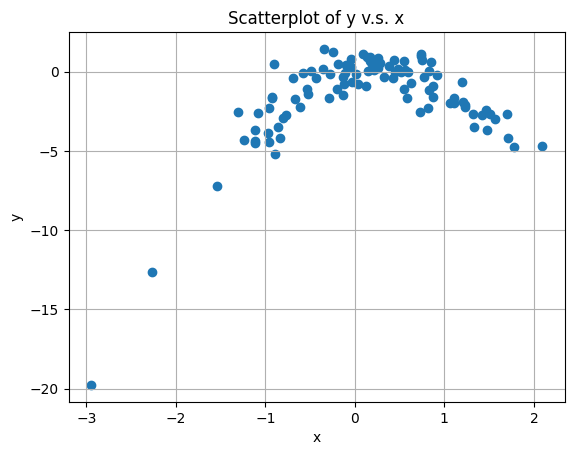

In [7]:
# Creating a scatterplot
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of y v.s. x')
plt.grid(True)
plt.show

In [8]:
# Creates a DataFrame
df = pd.DataFrame({'x': x, 'y': y})
df['x2'] = df['x'] ** 2
df['x3'] = df['x'] ** 3
df['x4'] = df['x'] ** 4

# Define the models: list of tuples
new_models = [
    ('linear', ['x']),
    ('quadratic', ['x', 'x2']),
    ('cubic', ['x', 'x2', 'x3']),
    ('quartic', ['x', 'x2', 'x3', 'x4'])
]

# Initialize Leave-One-Out Cross Validator
new_loo = LeaveOneOut()

# Dictionary to hold LOOCV errors for each model
new_loocv_errors = {}

# Compute LOOCV error for each model using cross_val_score
for name, features in new_models:
    X = df[features].values
    y_vals = df['y'].values

    # cross_val_score uses negative MSE, so we negate the result to get positive MSE values
    neg_mse_scores = cross_val_score(LinearRegression(), X, y_vals,
                                     scoring = 'neg_mean_squared_error', cv = new_loo)
    loocv_error = -np.mean(neg_mse_scores)
    new_loocv_errors[name] = loocv_error
    print(f"LOOCV Error for {name} model: {loocv_error:.4f}")

LOOCV Error for linear model: 7.5954
LOOCV Error for quadratic model: 0.9862
LOOCV Error for cubic model: 1.0675
LOOCV Error for quartic model: 1.0244


Part D : Repeat C using another random seed and report your results

Our results are not the same as we got before because when we set a new seed for our random number generator it generates different values for x and y which in turn gives us different equations and different test MSE values for our two models.

Part E : Which of the models in C had the smallest LOOCV error? Is this what you expected?

Our error for our quadratic model had the lowest test MSE in part C, I was expecting this because of how y is created (there is a x^2 in creation) and if you look at the scatterplot you can see what looks like a quadratic relationship.

Part F : Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in C using ordinary least squares.  Do these results agree with the conclusions drawn based on cross-validation results?



In [9]:
# Reads in the Weekly dataset
weekly = pd.read_csv('/Users/Camer/Downloads/Spring 2025 Classes/Stat 411/Stat 411 Book/All CSV Files/Weekly.csv')

In [10]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [11]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [12]:
weekly.tail()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up
1088,2010,1.034,0.283,1.281,2.969,-0.861,2.707105,0.069,Up


In [13]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [14]:
# Creates a DataFrame with the predictors we will be using
X = pd.DataFrame({'intercept': np.ones(weekly.shape[0]),
                  'Volume': weekly['Volume'],
                  'Lag1': weekly['Lag1'],
                  'Lag2': weekly['Lag2'],
                  'Year': weekly['Year']})

# Creates our response variable and sets it to the variable 'Today' in the weekly dataset
y = weekly['Today']

# Creates a model using Ordinary Least Squares (OLS) Regression and fits it
model = sm.OLS(y, X).fit()

# Outputs important information about the model we just built.
summarize(model)

,coef,std err,t,P>|t|
intercept,13.5193,43.826,0.308,0.758
Volume,-0.0266,0.079,-0.337,0.736
Lag1,-0.0730,0.030,-2.398,0.017
Lag2,0.0515,0.031,1.687,0.092
Year,-0.0067,0.022,-0.303,0.762


The resulting fitted model is Y = 13.5193 - 0.0266(Volume) - 0.073(Lag1) - 0.0515(Lag2) - 0.0067(Year)

In [15]:
# Creates the function we use to estimate the test MSE
def evalMSE(terms,
           response,
           train,
           test):

    mm = MS(terms)
    X_train = mm.fit_transform(train)
    y_train = train[response]

    X_test = mm.transform(test)
    y_test = test[response]

    results = sm.OLS(y_train, X_train).fit()
    test_pred = results.predict(X_test)

    return np.mean((y_test - test_pred)**2)

In [16]:
# Splits our data into two groups with an 80/20 split, with more variables in the training dataset.
weekly_train, weekly_test = train_test_split(weekly,
                                             test_size = 218,
                                             random_state = 174201)

# Estimates the test MSE
test_MSE = evalMSE(['Volume', 'Lag1', 'Lag2', 'Year'],
                   'Today',
                   weekly_train,
                   weekly_test)

test_MSE

np.float64(7.263093680423689)

Our estimate of the test MSE with a validation set made from an 80/20 split is 7.26.

In [17]:
# Initialize the model
model = LinearRegression()

# Perform 5-fold cross-validation using negative MSE as the scoring metric
scores = cross_val_score(model, X, y, cv = 5, scoring = 'neg_mean_squared_error')

# Convert negative MSE to positive values
mse_scores = -scores

print("MSE scores for each fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))


MSE scores for each fold: [ 2.68430444  2.82511767  8.63587461  3.07355425 10.84609048]
Average MSE: 5.61298828961594


Our average MSE was lower than before when we estimate the test MSE using K Fold cross validation where k = 5.

In [18]:
SqErrs = np.zeros(1089)

# The predictor variables we will use
design = MS(['Lag1', 'Lag2', 'Volume', 'Year'])

# Creates a for loop so we iterate through every value in the dataset and perform LOOCV.
for i in range(1089):

    # Creates the predictor training dataset from every other observation but i.
    X_train = design.fit_transform(weekly.drop([i]))

    # Creates the response training dataset from every other observation but i.
    y_train = weekly['Today'].drop([i])

    # Creates our model using Ordinary Least Squares (OLS) Regression
    model = sm.OLS(y_train, X_train)

    # Fits our results
    results = model.fit()

    # Creates our predictor test training set with only the observation i in it.
    X_test = design.transform(weekly.iloc[[i]])

    # Creates our response test training set with only the observation i in it.
    y_test = weekly['Today'].iloc[i]

    # Gets our prediction
    test_pred = results.predict(X_test)

    # Calculates the squared difference between the actual result and our estimate
    a = (y_test - test_pred)**2

    # Sets the ith value for SqErrs to a for the ith iteration
    SqErrs[i] = float(a.iloc[0])

# Calculates the mean Squared Error over all of our estimates
np.mean(SqErrs)

np.float64(5.6042237514063915)

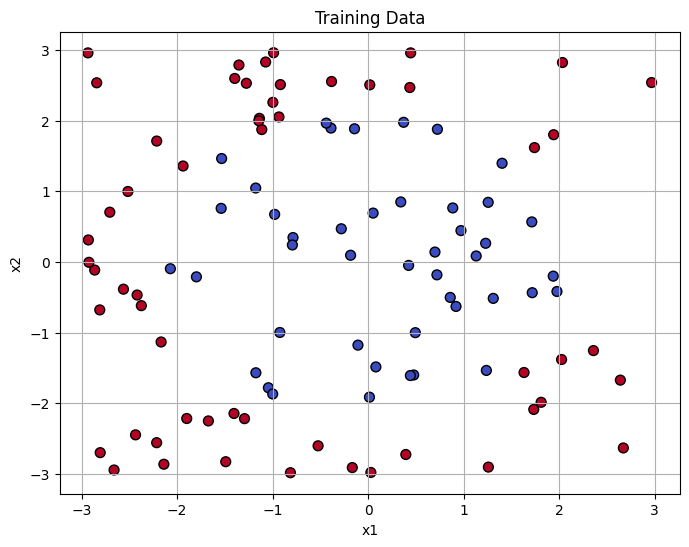

In [19]:
# Set the random seed for reproducibility
rng = np.random.default_rng(174201)

# Create a simulated training dataset
n = 100
x1 = rng.uniform(-3, 3, n)
x2 = rng.uniform(-3, 3, n)

# Create a binary response
y = (x1 ** 2 + x2 ** 2 > 4.5).astype(int)

# Combine into DataFrame for convenience
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# Plot the training data
plt.figure(figsize=(8, 6))
plt.scatter(data['x1'], data['x2'], c = data['y'], cmap = 'coolwarm', edgecolor = 'k', s = 50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training Data')
plt.grid(True)
plt.show()

This is all I was able to get done for the second additional problem because I don't know if I was looking in the wrong place, but I couldn't find the data we generated at the end of the lab in chapter 2.  I tried to create my own dataset but realized none of my numbers would be correct.

In [ ]:
RandomHitters = df(['Name', 'Salary', 'Hits', 'Years', 'logSalary'])
